# Part II Project Notebook

Notebook outlining implementation of my Part II Project

## ACCESS

Data source will be from Yahoo Finance. Using `yfinance` to easily access this data. 

Dataset consists of past 5 years of historical price data of the following companies:
- AAPL
- GOOG
- MSFT
- AMZN

In [82]:
import yfinance as yf

stock_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
data = yf.download(stock_list, start="2018-01-01", end="2023-01-1")
print('data fields downloaded:', set(data.columns.get_level_values(0)))
data.head()

[*********************100%%**********************]  4 of 4 completed
data fields downloaded: {'Adj Close', 'Volume', 'Open', 'Close', 'Low', 'High'}


Adj Close                                       Close             \
                 AAPL       AMZN       GOOG       MSFT       AAPL       AMZN   
Date                                                                           
2018-01-02  40.722874  59.450500  53.250000  80.229012  43.064999  59.450500   
2018-01-03  40.715782  60.209999  54.124001  80.602386  43.057499  60.209999   
2018-01-04  40.904903  60.479500  54.320000  81.311798  43.257500  60.479500   
2018-01-05  41.370617  61.457001  55.111500  82.319916  43.750000  61.457001   
2018-01-08  41.216965  62.343498  55.347000  82.403931  43.587502  62.343498   

                                       High             ...        Low  \
                 GOOG       MSFT       AAPL       AMZN  ...       GOOG   
Date                                                    ...              
2018-01-02  53.250000  85.949997  43.075001  59.500000  ...  52.261501   
2018-01-03  54.124001  86.349998  43.637501  60.274502  ...  53.160500   
2018-01-04  54.320000  87.110001  43.367500  60.793499  ...  54.200100   
2018-01-05  55.111500  88.190002  43.842499  61.457001  ...  54.599998   
2018-01-08  55.347000  88.279999  43.902500  62.653999  ...  55.081001   

                            Open                                      Volume  \
                 MSFT       AAPL       AMZN       GOOG       MSFT       AAPL   
Date                                                                           
2018-01-02  85.500000  42.540001  58.599998  52.417000  86.129997  102223600   
2018-01-03  85.970001  43.132500  59.415001  53.215500  86.059998  118071600   
2018-01-04  86.570000  43.134998  60.250000  54.400002  86.589996   89738400   
2018-01-05  87.430000  43.360001  60.875500  54.700001  87.660004   94640000   
2018-01-08  87.599998  43.587502  61.799999  55.111500  88.199997   82271200   

                                          
                AMZN      GOOG      MSFT  
Date                                      
2018-01-02  53890000  24752000  22483800  
2018-01-03  62176000  28604000  26061400  
2018-01-04  60442000  20092000  21912000  
2018-01-05  70894000  25582000  23407100  
2018-01-08  85590000  20952000  22113000  

[5 rows x 24 columns]

We have the Close, Adjusted Close, Open, Low, High and Volume fields.

In [83]:
AAPL = data.xs('AAPL', level=1, axis=1)
GOOG = data.xs('GOOG', level=1, axis=1)
MSFT = data.xs('MSFT', level=1, axis=1)
AMZN = data.xs('AMZN', level=1, axis=1)

company_list = [AAPL, GOOG, MSFT, AMZN]

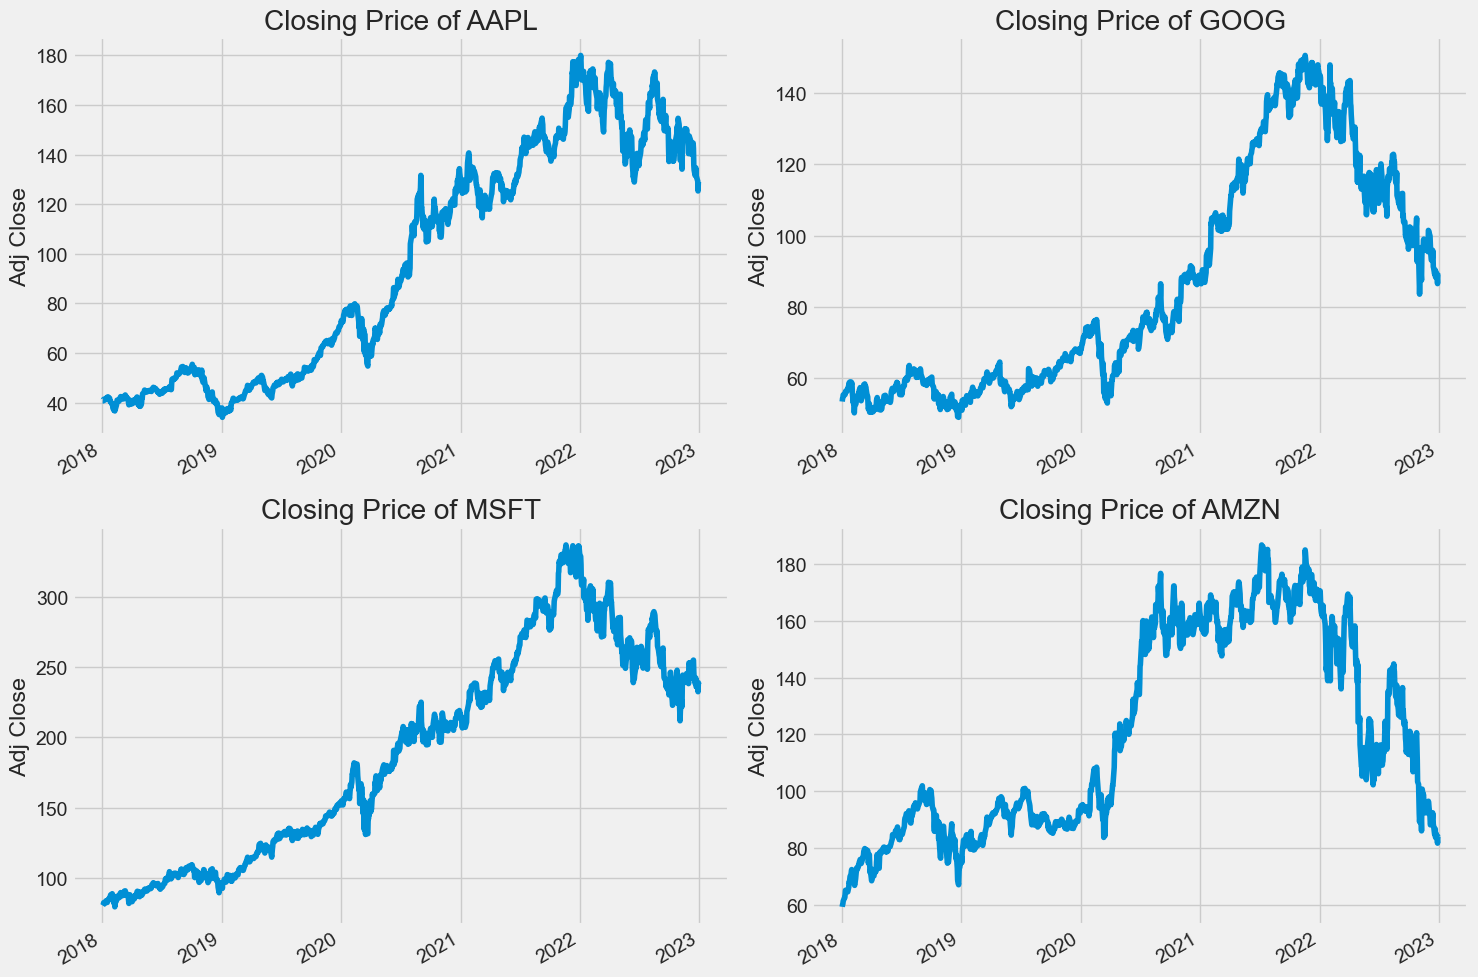

In [84]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_list[i]}")
    
plt.tight_layout()


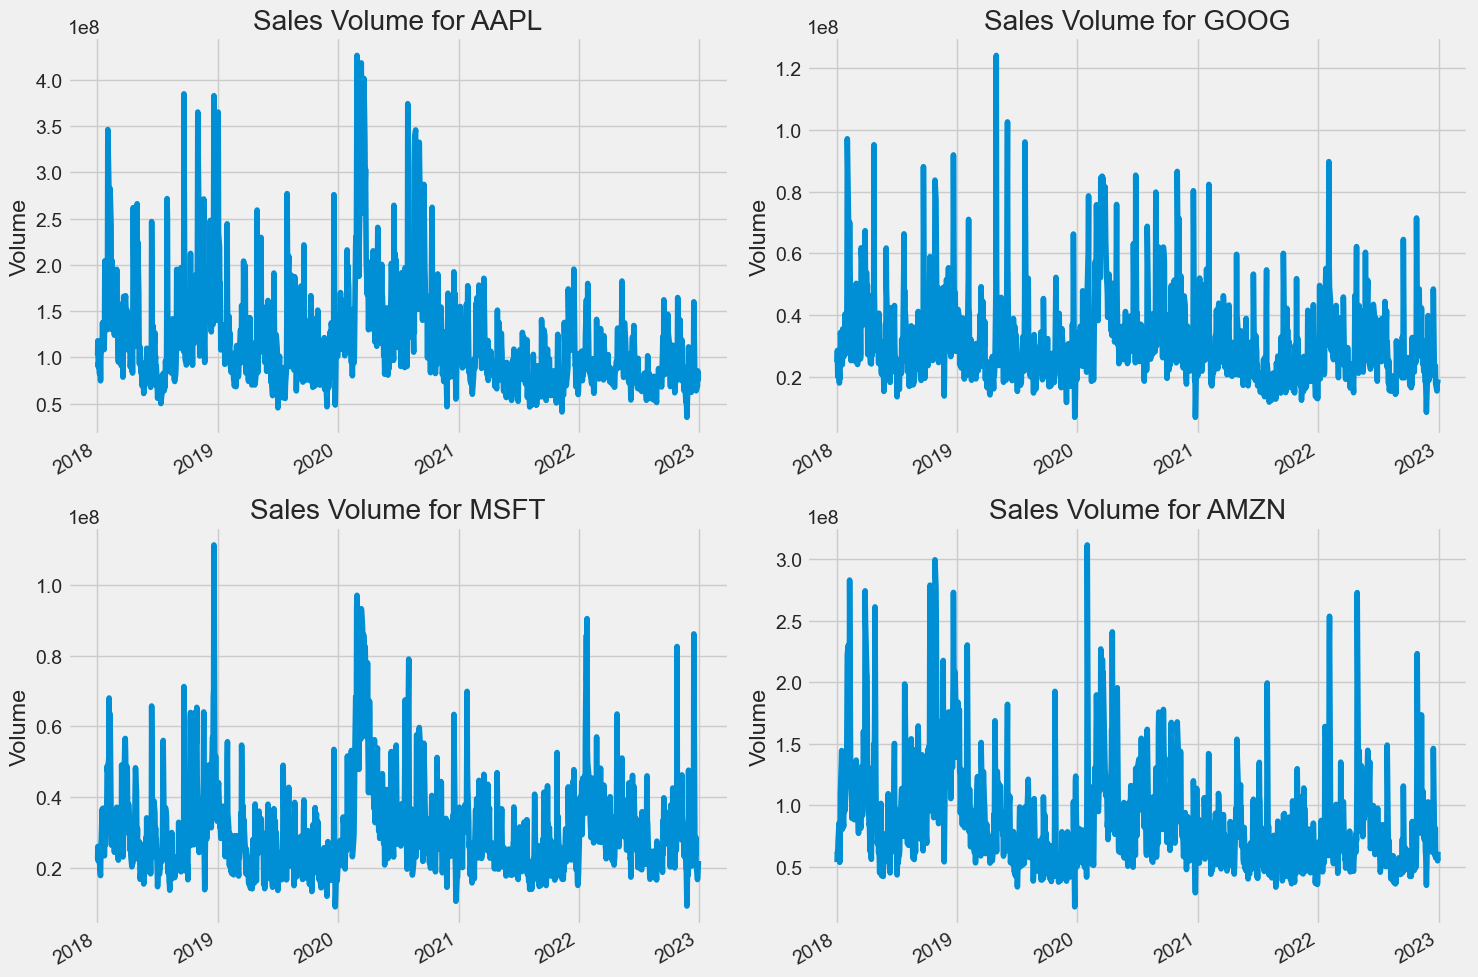

In [85]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_list[i - 1]}")
    
plt.tight_layout()

## ASSESS

*Code adapted from https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm*

We look at:
1. change in price of the stock over time?
2. daily return of the stock on average?
3. moving average of the various stocks?
4. correlation between different stocks'?
5. how much value do we put at risk by investing in a particular stock?

Let's introduce a few additional features that we may find useful to include in our models. 

First, the Moving Average (MA), which is a common and simple technical analysis indicator. It smooths out volatility.

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_10265/2620952860.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_10265/2620952860.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_10265/2620952860.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

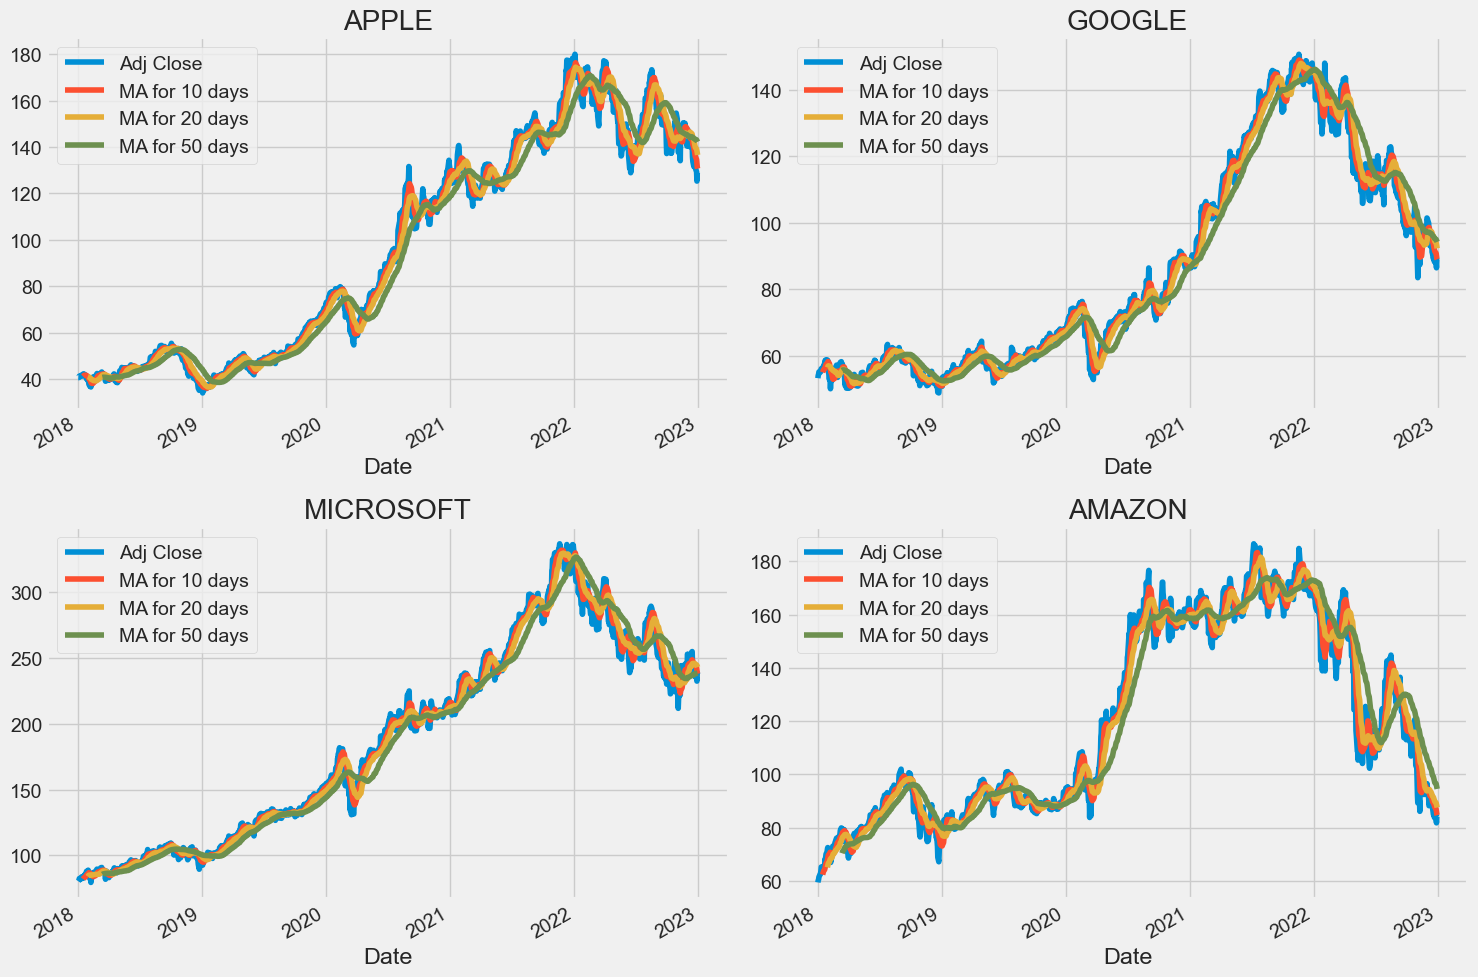

In [86]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

Now daily returns! Now we're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_10265/3236142522.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_10265/3236142522.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_10265/3236142522.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

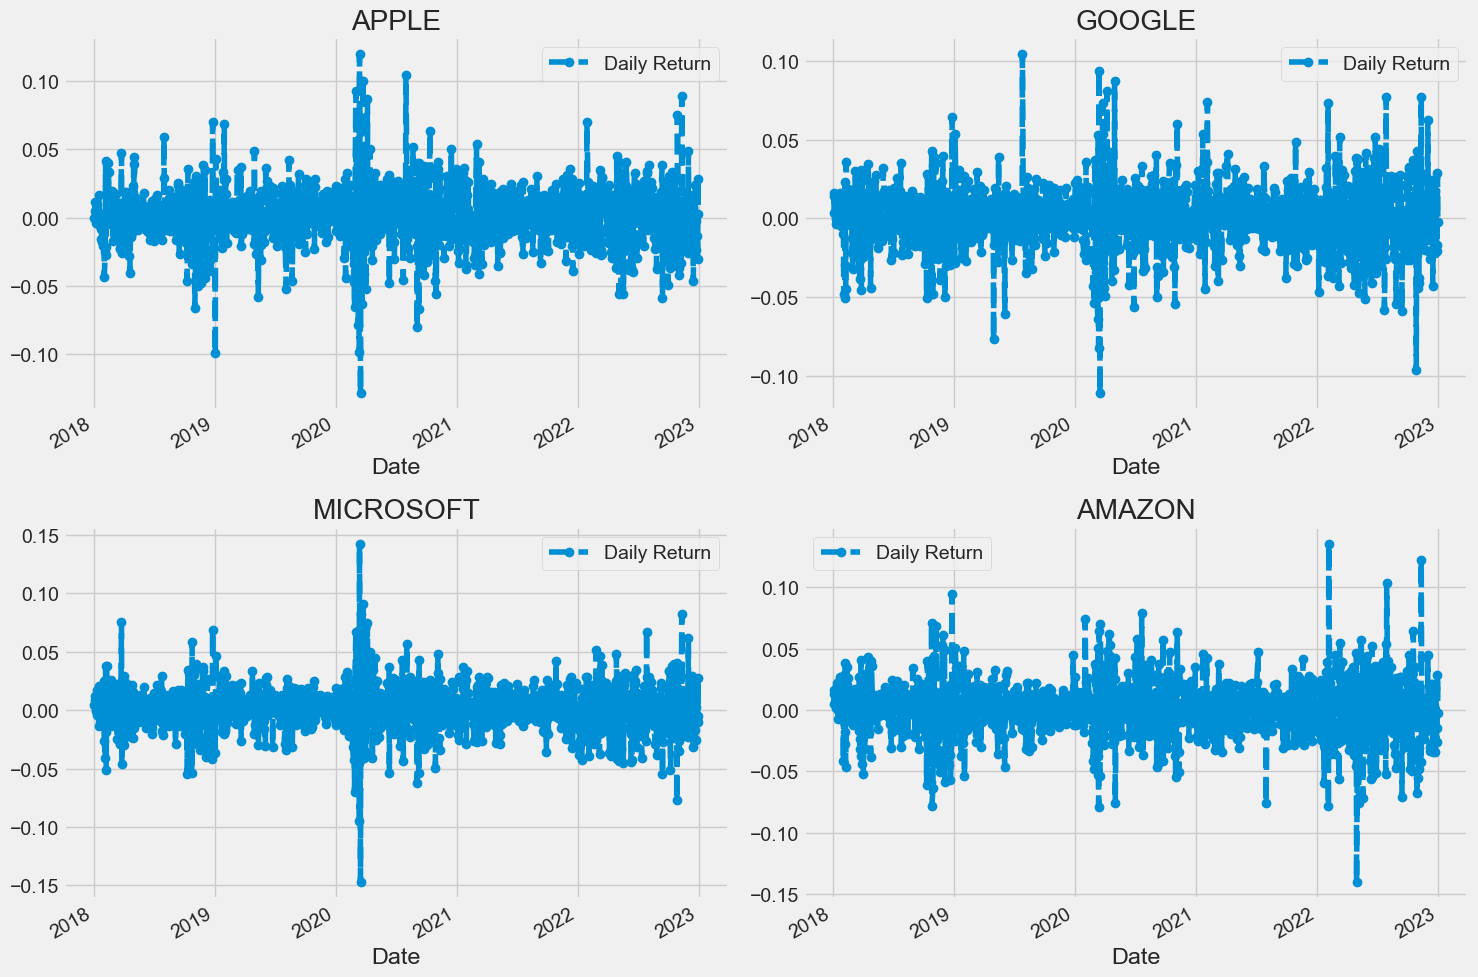

In [87]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure

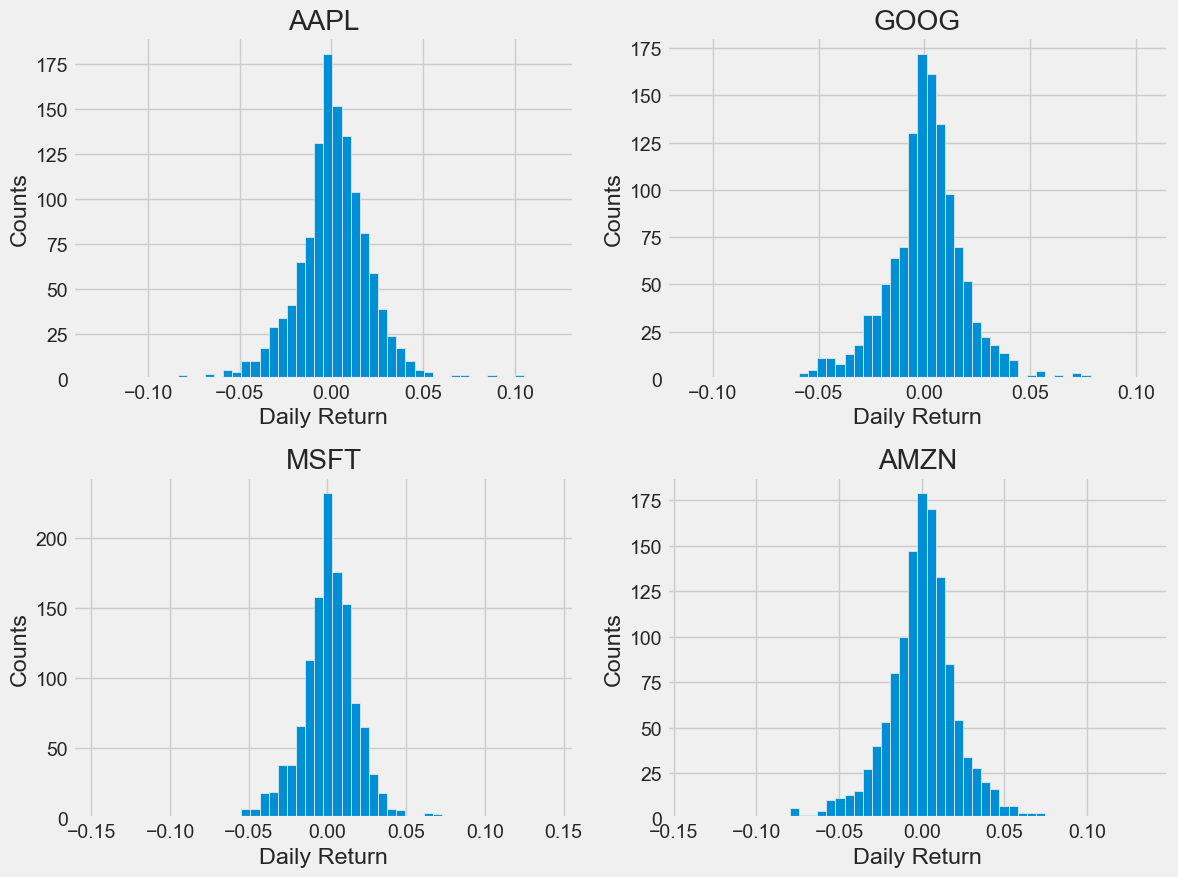

In [88]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Counts')
    plt.xlabel("Daily Return")
    plt.title(f"{stock_list[i]}")
    
plt.tight_layout()

Now let's look at correlation between diff stock close prices.

In [89]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = data["Adj Close"]

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,-0.000174,0.012775,0.016413,0.004654
2018-01-04,0.004645,0.004476,0.003621,0.008801
2018-01-05,0.011385,0.016163,0.014571,0.012398
2018-01-08,-0.003714,0.014425,0.004273,0.001021


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

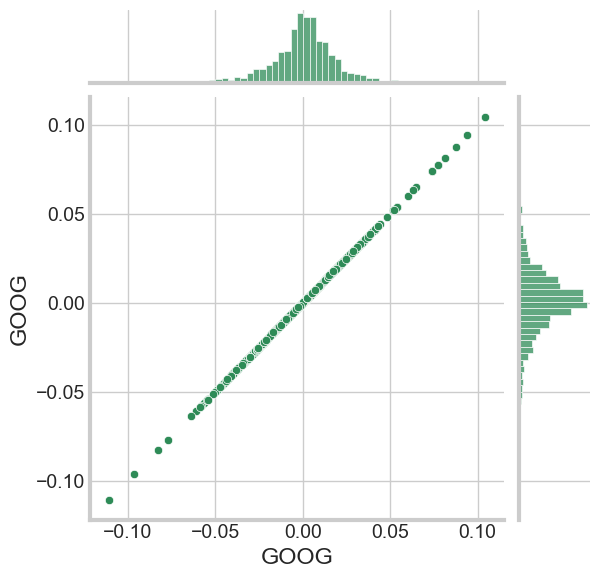

In [90]:
import seaborn as sns
sns.set_style('whitegrid')

# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

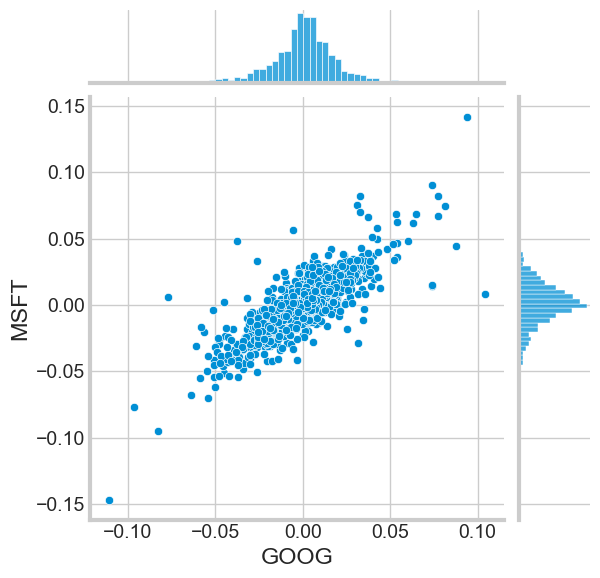

In [91]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

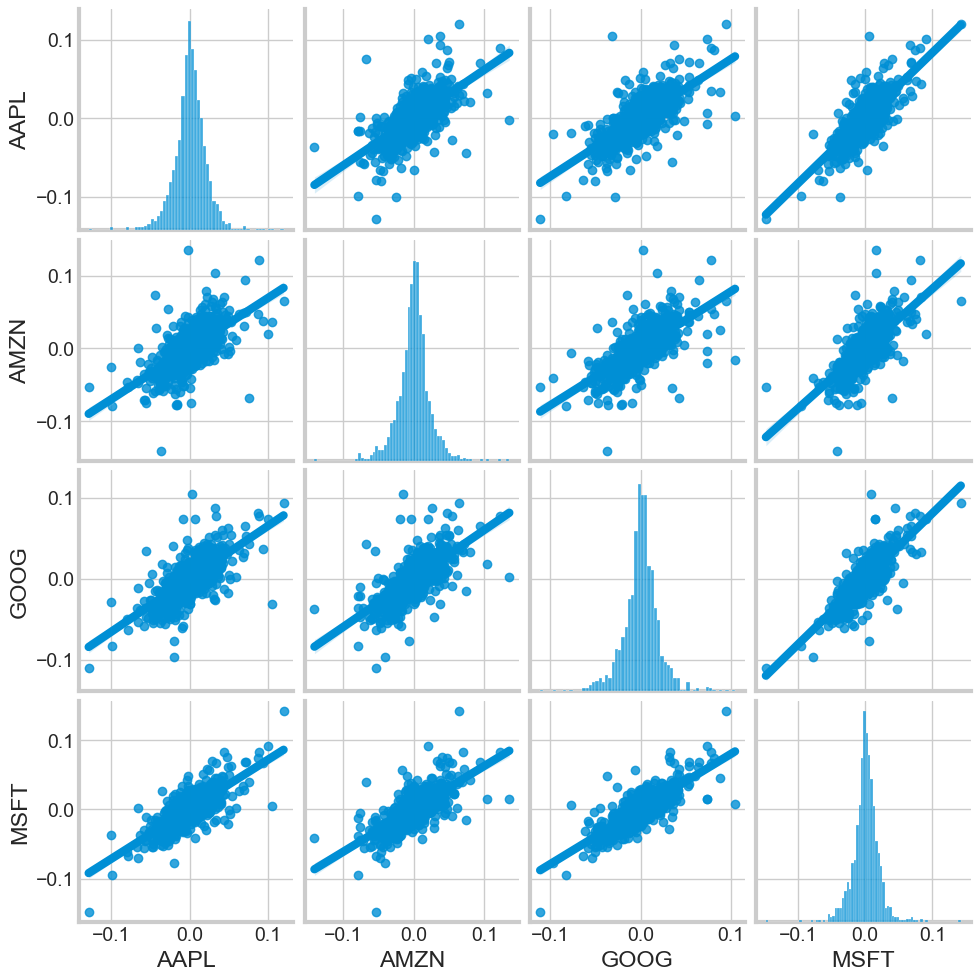

In [92]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. 

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

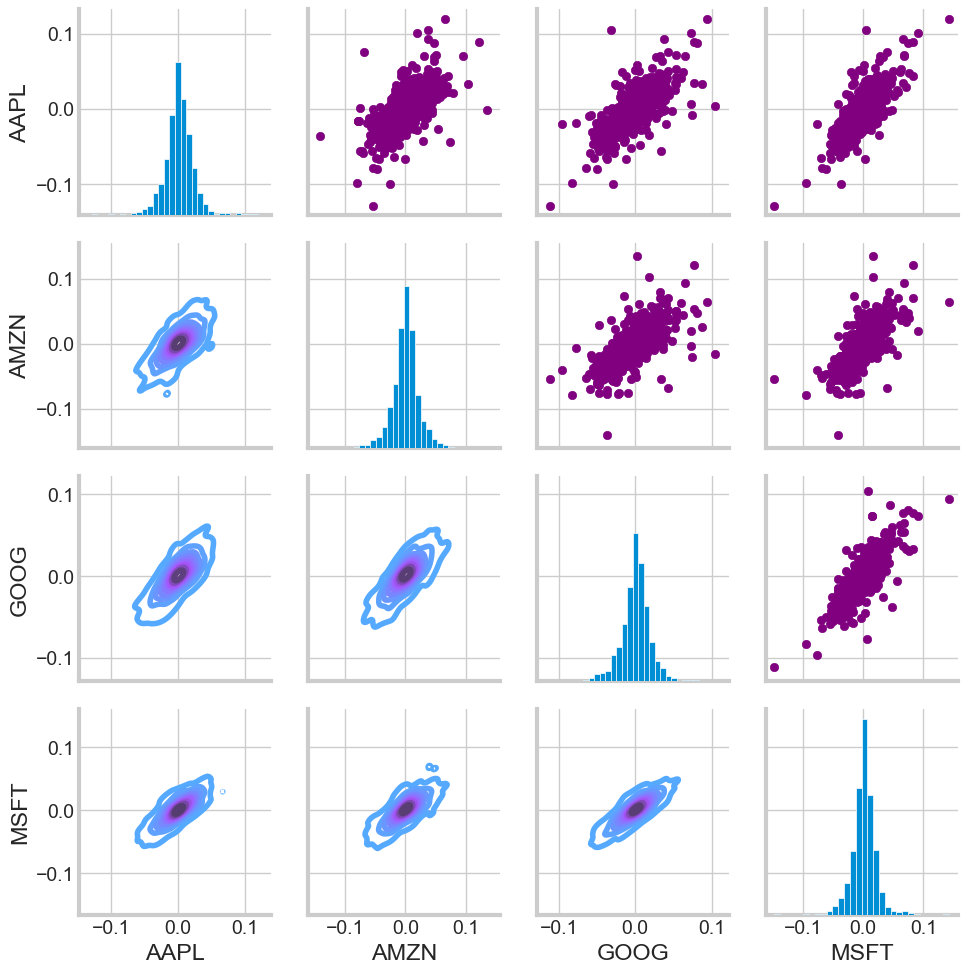

In [93]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

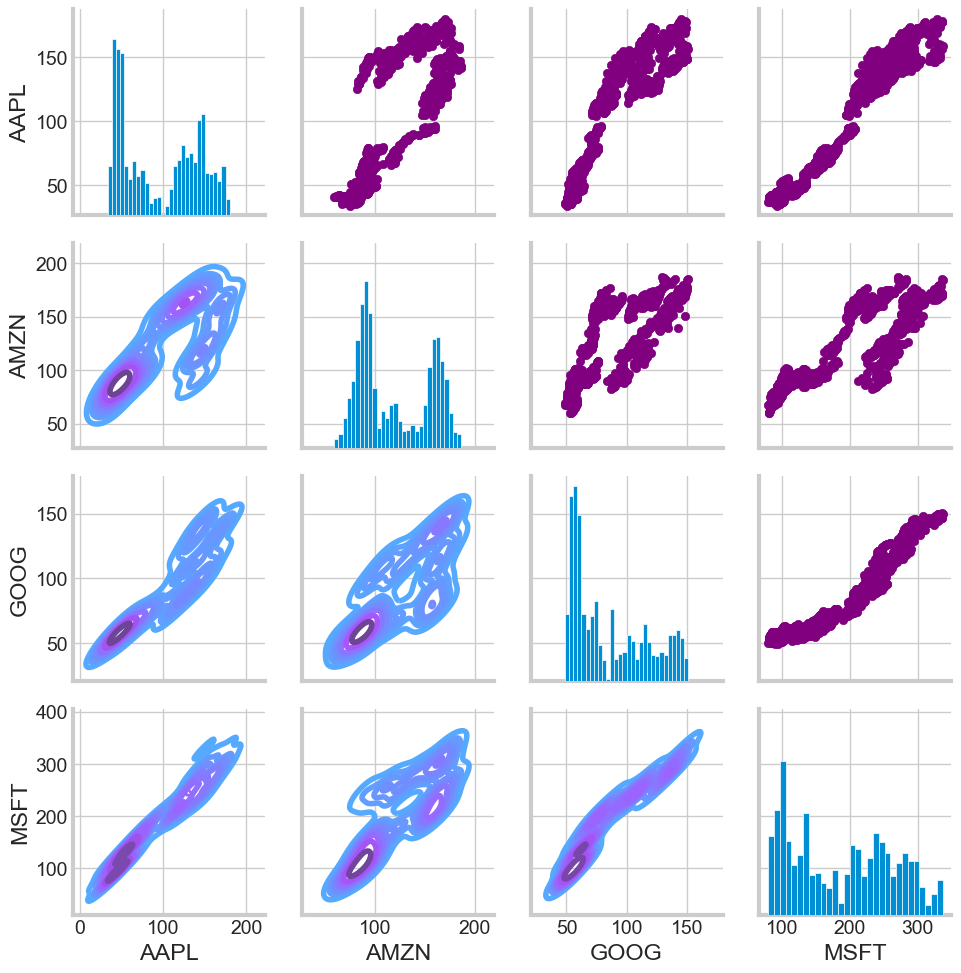

In [94]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

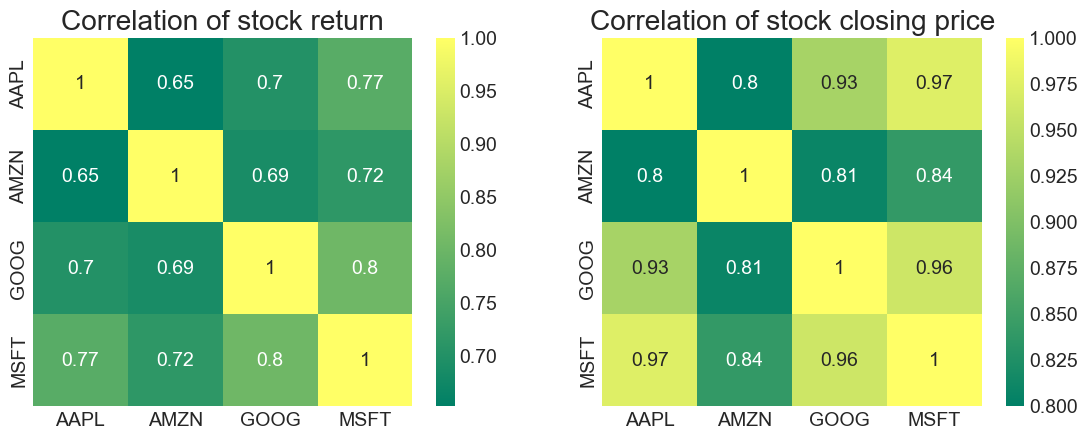

In [95]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

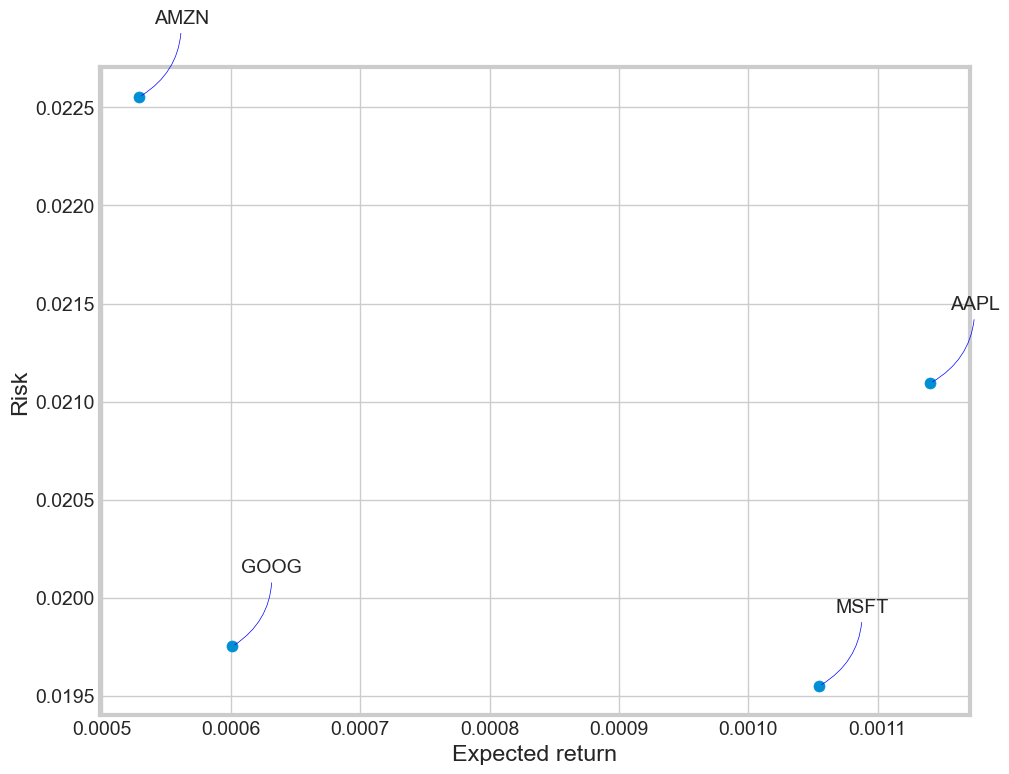

In [96]:
import numpy as np

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## ADDRESS

### Linear Model

*Code adapted from on https://www.kaggle.com/code/nikhilkohli/stock-prediction-using-linear-regression-starter*

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [112]:
# Load data
Stock = AAPL
df_Stock = Stock

df_Stock["Close Forecast"] = df_Stock["Close"].shift(-1)
df_Stock = df_Stock.dropna()
df_Stock.head()

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_10265/3610531736.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Adj Close,Close,High,Low,Open,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return,Close Forecast
Date,,,,,,,,,,,
2018-03-14,42.355839,44.610001,45.130001,44.452499,45.080002,117473600,42.174966,41.728834,40.814299,-0.008502,44.662498
2018-03-15,42.405682,44.662498,45.060001,44.517502,44.625000,90975200,42.261605,41.862708,40.847955,0.001177,44.505001
2018-03-16,42.256142,44.505001,44.779999,44.404999,44.662498,157618800,42.304568,41.922406,40.878763,-0.003526,43.825001
2018-03-19,41.610508,43.825001,44.367500,43.415001,44.330002,133787200,42.268489,41.956468,40.892875,-0.015279,43.810001
2018-03-20,41.596268,43.810001,44.200001,43.735001,43.810001,78597600,42.234545,41.996702,40.897388,-0.000342,42.817501


In [113]:
df_Stock.tail()

,Adj Close,Close,High,Low,Open,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return,Close Forecast
Date,,,,,,,,,,,
2022-12-22,131.495010,132.229996,134.559998,130.300003,134.350006,77852100,137.102666,140.687131,143.474887,-0.023773,131.860001
2022-12-23,131.127060,131.860001,132.419998,129.639999,130.919998,63814900,136.078391,139.879147,143.258234,-0.002798,130.029999
2022-12-27,129.307236,130.029999,131.410004,128.720001,131.380005,69007800,134.640428,139.173590,143.096720,-0.013878,126.040001
2022-12-28,125.339409,126.040001,131.029999,125.870003,129.669998,85438400,132.708227,138.421295,142.775831,-0.030685,129.610001
2022-12-29,128.889572,129.610001,130.479996,127.730003,127.989998,75703700,131.355785,137.505414,142.499337,0.028324,129.929993


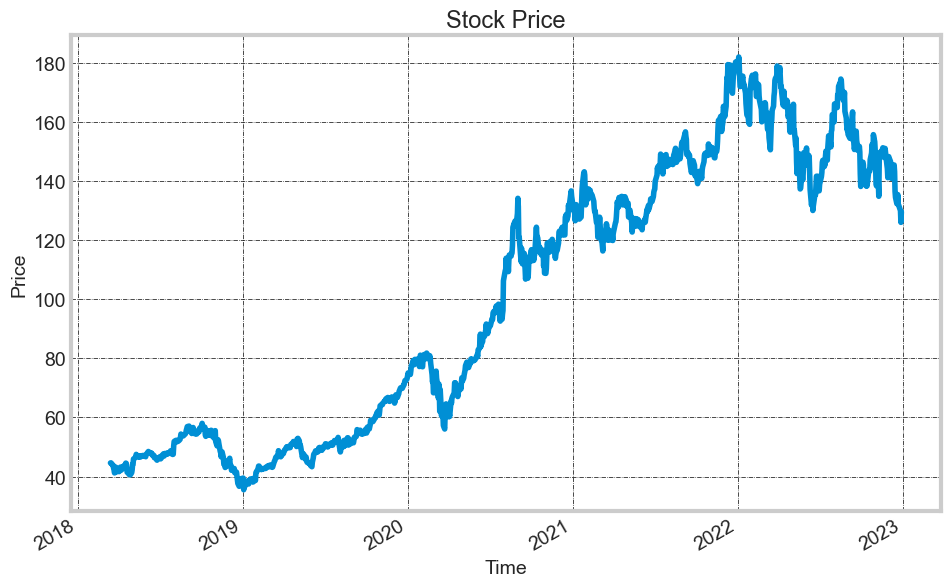

In [114]:
# Plot time series
df_Stock['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [115]:
# Test Train Set
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(columns=['Close Forecast'], axis=1)
    target = df_Stock['Close Forecast']
    

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [116]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is -  1209
Training Set length -  1063
Validation Set length -  120
Test Set length -  24
(1063, 10) (120, 10) (26, 10)
(1063,) (120,) (26,)


In [117]:
# Prediction using linear regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [118]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 1.07337065e-01  5.68413801e-01  3.46092478e-01  5.44974281e-01
 -5.87999856e-01  1.65351933e-09  5.01330977e-02 -3.88308256e-02
  1.26158156e-02 -1.18641249e+01]
LR Intercept: 
 0.14958709621696187


In [119]:
# Evaluation
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9979739628992607


In [120]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [121]:
# Predict test dataset
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [122]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2)) 
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))

print(' ')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2)) 
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))

print(' ')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2)) 
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 1.47
Training Mean Squared Error: 4.08
Training RMSE:  2.02
Training MAE:  1.37
 
Validation R-squared:  0.89
Validation Explained Variation:  0.89
Validation MAPE: 1.79
Validation Mean Squared Error: 4.08
Validation RMSE:  3.43
Validation MAE:  2.66
 
Test R-squared:  0.83
Test Explained Variation:  0.84
Test MAPE: 1.7
Test Mean Squared Error: 8.96
Test RMSE:  2.99
Test MAE:  2.36


In [126]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred["Residuals"] = df_pred["Predicted"] - df_pred["Actual"]
df_pred

,Date,Actual,Predicted,Residuals
0,2022-06-02,145.380005,151.085737,5.705732
1,2022-06-03,146.139999,145.987231,-0.152768
2,2022-06-06,148.710007,146.380597,-2.329410
3,2022-06-07,147.960007,149.278546,1.318539
4,2022-06-08,142.639999,148.706494,6.066494
...,...,...,...,...
115,2022-11-15,148.789993,149.412618,0.622625
116,2022-11-16,150.720001,148.611487,-2.108514
117,2022-11-17,151.289993,151.256778,-0.033215
118,2022-11-18,148.009995,150.842709,2.832715


<Axes: >

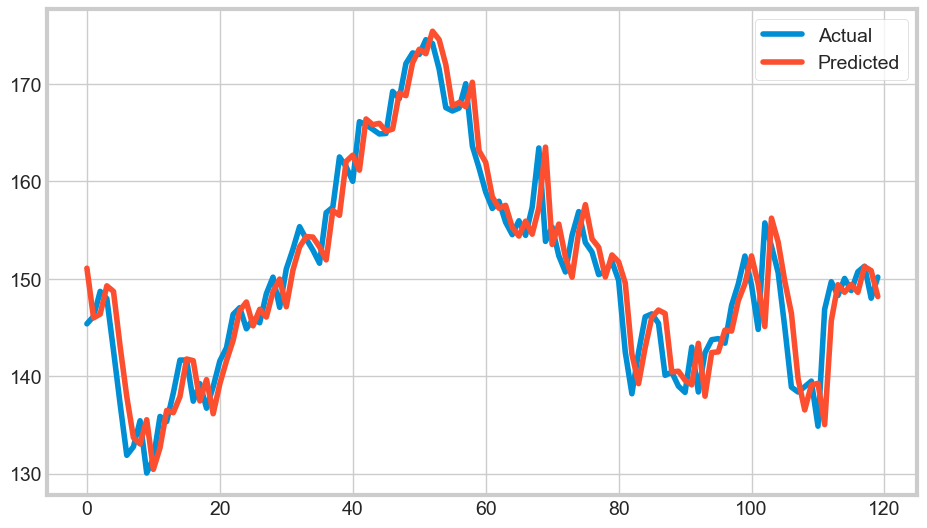

In [127]:
# Plot predicted vs actual
df_pred[['Actual', 'Predicted']].plot()

<Axes: >

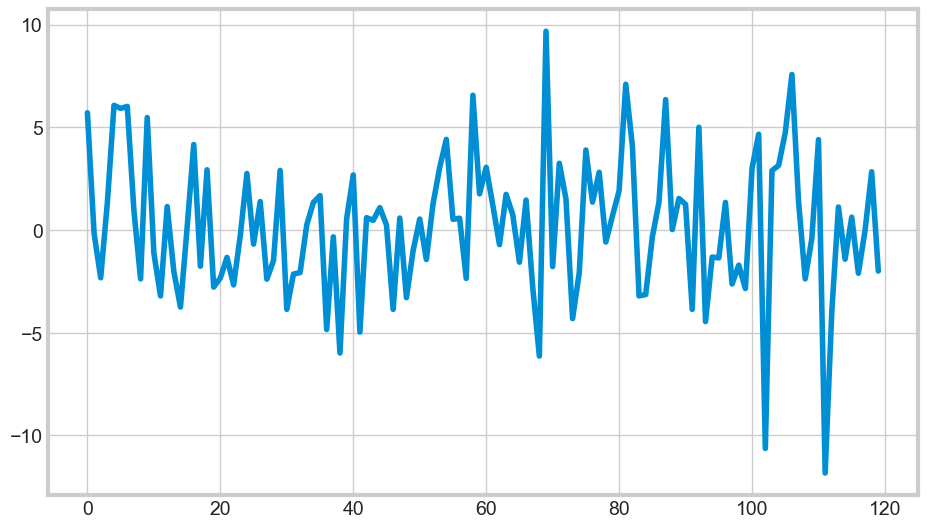

In [128]:
df_pred["Residuals"].plot()

Not very good... Todo: improve

### ARIMA Model

*Code adapted from https://www.kaggle.com/code/nageshsingh/stock-market-forecasting-arima/notebook*

Kernel density estimation (KDE) is a non-parametric way to estimate the PDF of a random variable.

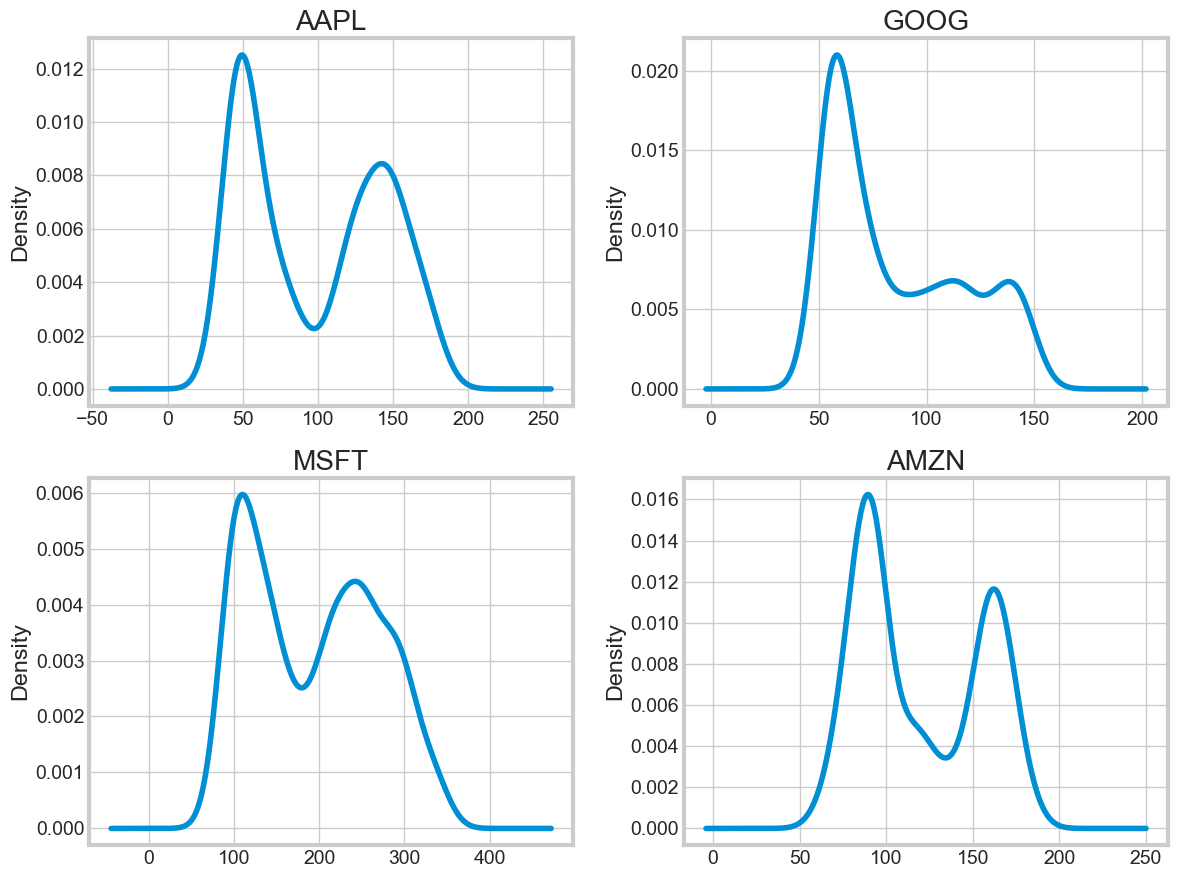

In [ ]:
plt.figure(figsize=(12, 9))
for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
    company['Close'].plot(kind="kde")
    plt.ylabel('Density')
    plt.title(f"{stock_list[i]}")
    
plt.tight_layout()

Given a time series, it is thought to consist of 3 systematic components:
1. Level: average value in series
2. Trend: increasing or decreasing value in the series
3. Seasonality: the repeating short-term cycle in the series
And 1 non-systematic component:
1. Noise: random variation in the series

Time series analysis only works with stationary data so we must first check that with the ADF (Augmented Dickey-Fuller) test.

DF is a popular statistical test used to determine the presence of unit root in the series (hence help us understand if the series is stationary or not).

- Null hypothesis: series has unit root (value of $a=1$)
- Alternate hypothesis: series has no unit root

If we fail to reject the null hypothesis, we can say the series is non-stationary. This means the series is linear or difference stationary. If both mean and standard deviation are flat lines (i.e. const. mean and const. variance), the series becomes stationary.

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


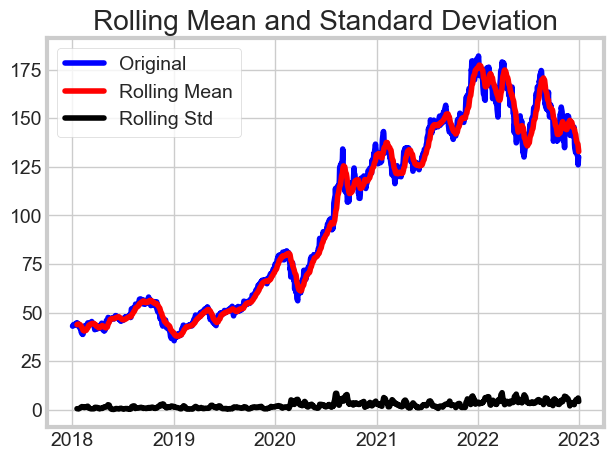

Results of dickey fuller test
Test Statistics                  -1.073951
p-value                           0.725347
No. of lags used                 11.000000
Number of observations used    1247.000000
critical value (1%)              -3.435605
critical value (5%)              -2.863861
critical value (10%)             -2.568005
dtype: float64


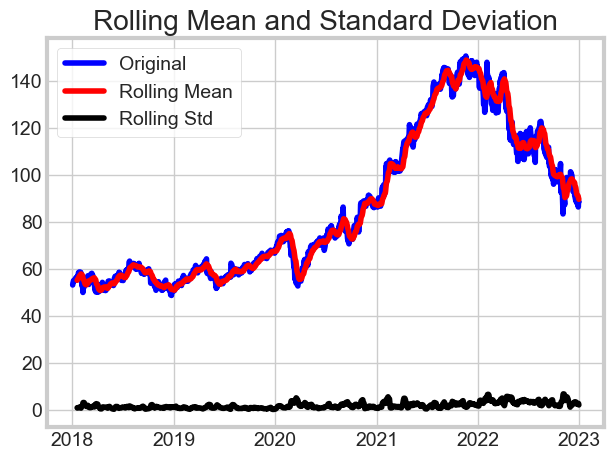

Results of dickey fuller test
Test Statistics                  -1.210835
p-value                           0.668918
No. of lags used                  1.000000
Number of observations used    1257.000000
critical value (1%)              -3.435563
critical value (5%)              -2.863842
critical value (10%)             -2.567996
dtype: float64


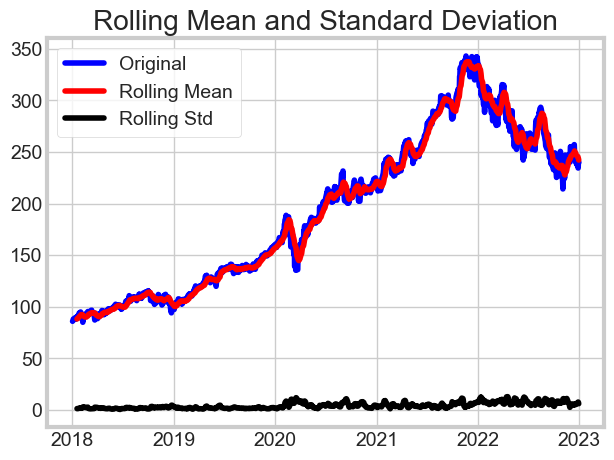

Results of dickey fuller test
Test Statistics                  -1.309322
p-value                           0.624897
No. of lags used                  9.000000
Number of observations used    1249.000000
critical value (1%)              -3.435596
critical value (5%)              -2.863857
critical value (10%)             -2.568004
dtype: float64


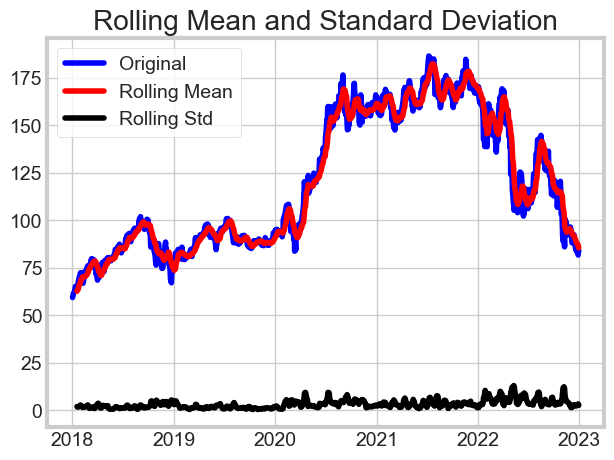

Results of dickey fuller test
Test Statistics                  -1.705438
p-value                           0.428313
No. of lags used                  0.000000
Number of observations used    1258.000000
critical value (1%)              -3.435559
critical value (5%)              -2.863840
critical value (10%)             -2.567995
dtype: float64


In [ ]:
for i, company in enumerate(company_list):
    test_stationarity(company["Close"])

For all companies, p-value is greater than 0.05 so we cannot reject the Null hypothesis (with 5% significance). Also, test statistic is greater than the critical values so data is non-stationary.

So let's separate Trend and Seasonality from the time series.

For now, let's focus on AAPl stock

In [ ]:
df_close = AAPL["Close"]

<Figure size 1000x600 with 0 Axes>

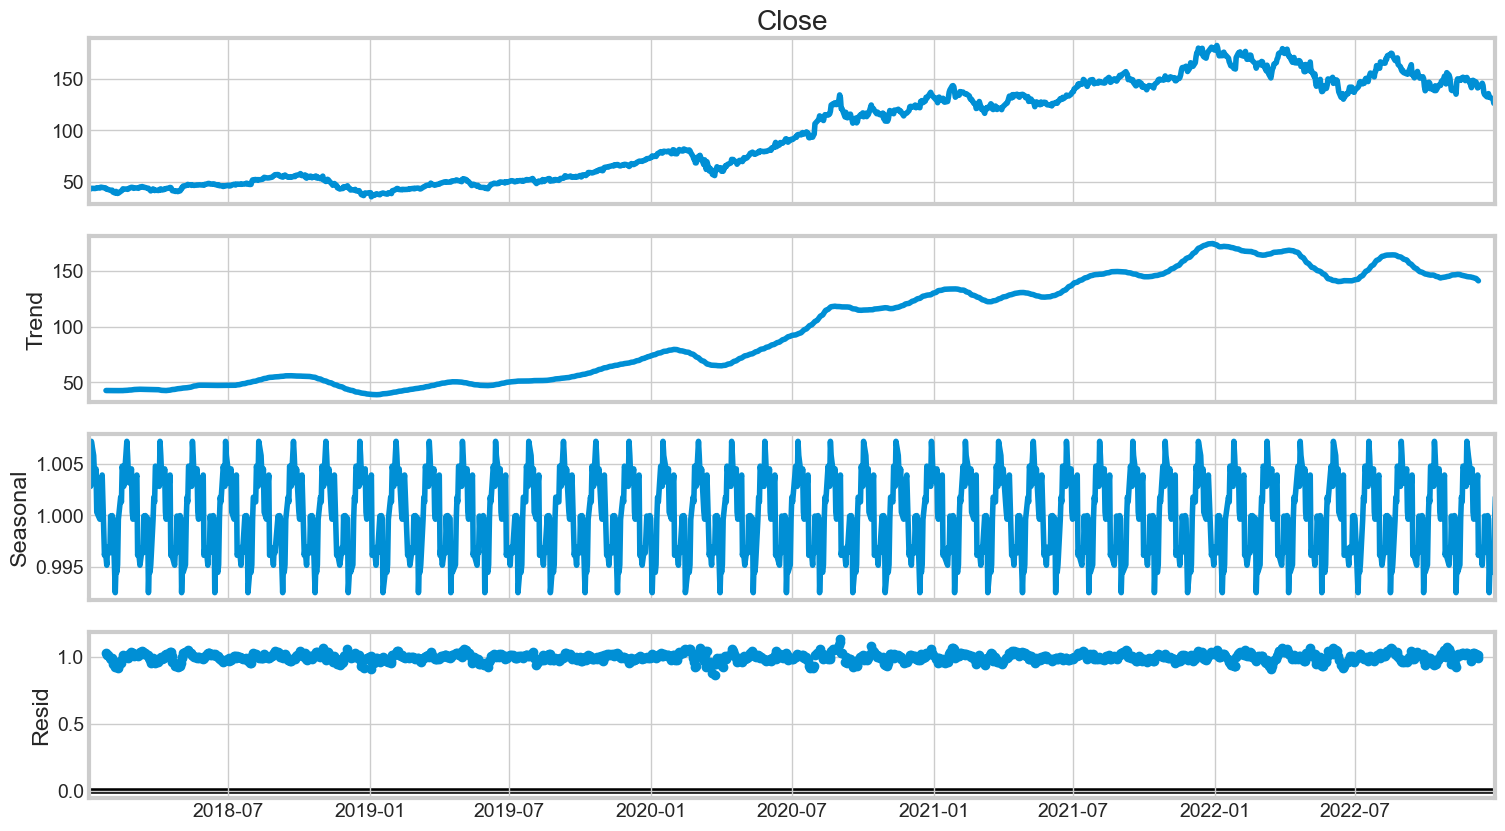

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(df_close, model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


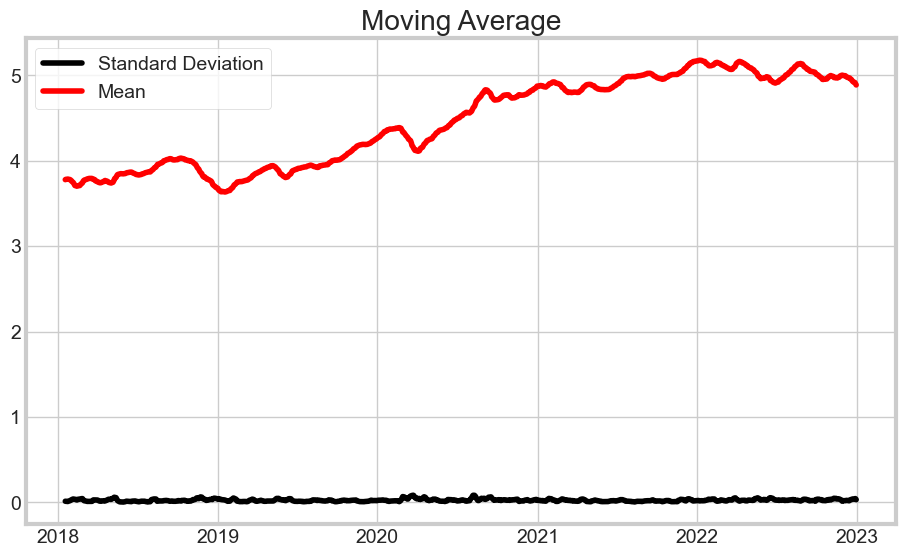

In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
import numpy as np
from pylab import rcParams

rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

Now we create the ARIMA model

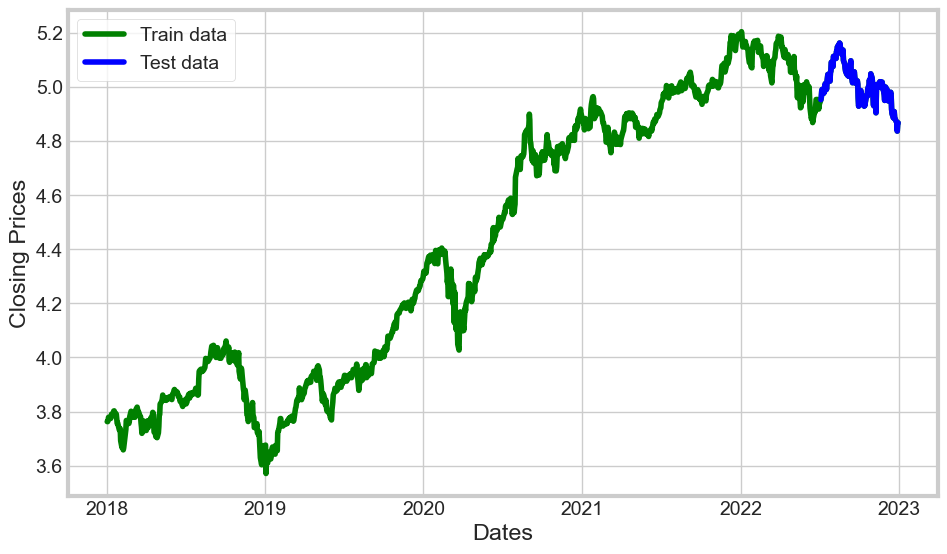

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

For our ARIMA model, we need to choose $p,q,d$. We can do so manually by observing the plots of ACF and PACF but we can instead use Auto ARIMA to get the best parameters without having to plot these graphs.

`auto_arima` seeks optimal parameters and returns a fitted ARIMA model. Works by conducting differencing tests (i.e. Kwiatkowski-Phillips-Schmidt-Shin, Augmented Dickey-Fuller or Phillips-Perron) to detereming the order of differencing, $d$, and then fitting models within ranges of defined `start_p`, `max_p`, `start_q`, `max_q` ranges. If seasonal optional is enabled, `auto_arima` also seeks to identify the optimal P and Q hyperparameters after conducting the Canova-Hansen test to determine the optimal order of seasonal differencing D.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5516.683, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5531.209, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5530.843, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5516.001, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-5529.245, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5529.257, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-5527.234, Time=0.26 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-5529.808, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.871 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1130
Model:               SARIMAX(1, 1, 0)   Log Likelihood                2768.604
Date:                Fri, 12 Jan 2024   AIC                          -5531.209
Time:                       

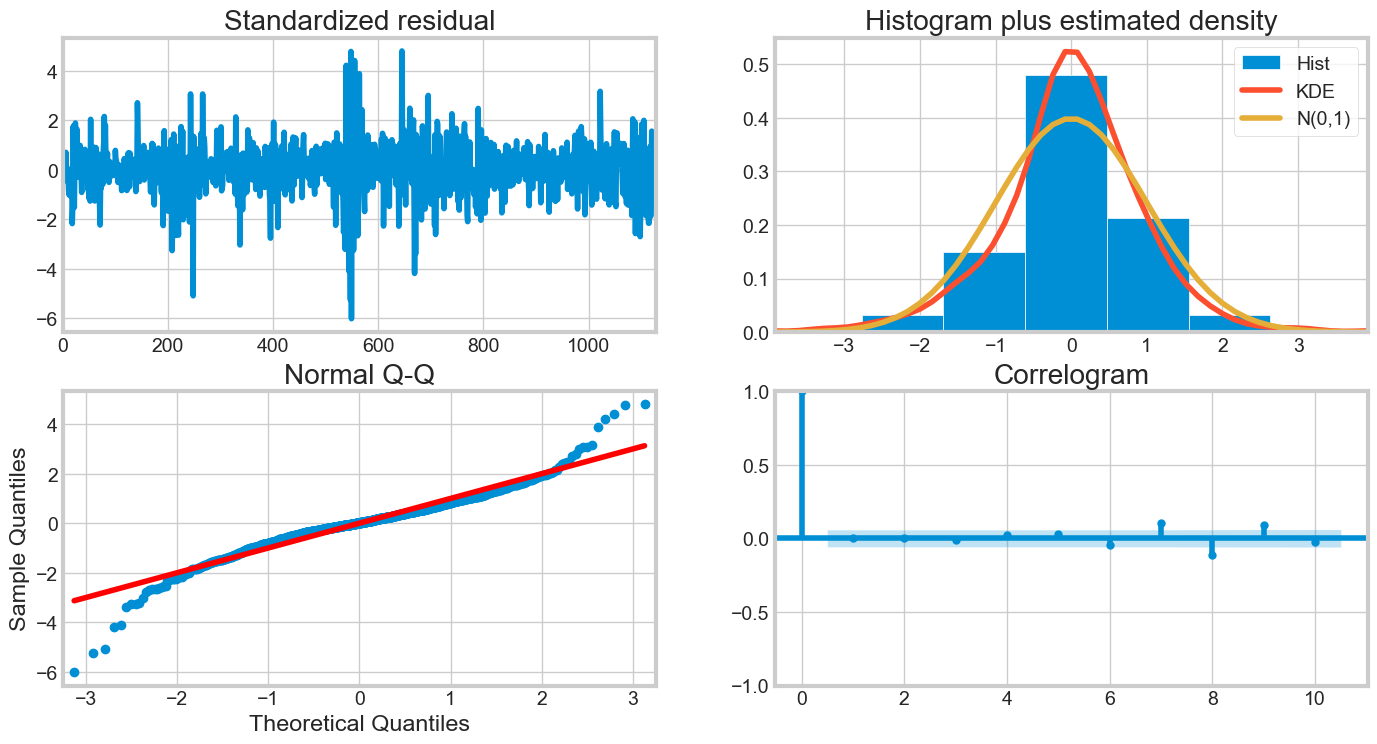

In [ ]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=1,           # let model determine 'd'
                      max_d=2,
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0,           # order of seasonal differencing, auto 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


How do we interpret the plots? (Todo: verify)
- Top left: residual errors seem to fluctuate around mean of zero and have uniform variance?
- Top right: suggests a normal distribution with mean zero
- Bottom left: all dots should fall on red line. Significant deviations implies distribution is skewed.
- Bottom right: The Correlogram, aka ACF plot, shows residula errors are not autocorrelated. Autocorrelation implies there is some pattern in residual errors which are not explained in the model (so we will need to look for more predictors to the model).

Overal seems to be a good fit, so create our ARIMA model with these parameters: `p,d,q=1,1,1`.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#Modeling
# Build Model
model = ARIMA(train_data, order=(4,2,3))  
fitted = model.fit() 
print(fitted.summary())

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1130
Model:                 ARIMA(4, 2, 3)   Log Likelihood                2768.602
Date:                Fri, 12 Jan 2024   AIC                          -5521.204
Time:                        15:09:23   BIC                          -5480.979
Sample:                             0   HQIC                         -5506.006
                               - 1130                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9769      0.054    -36.335      0.000      -2.083      -1.870
ar.L2         -1.1265      0.074    -15.227      0.000      -1.272      -0.981
ar.L3         -0.0591      0.051     -1.169      0.2

/opt/homebrew/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Now let's forecast stock prices on test, keeping 95% confidence level.

In [ ]:
# Obtain forecast
forecast_result = fitted.get_forecast(steps=len(test_data))

# Get the forecasted values
fc = forecast_result.predicted_mean

# Get the standard error
se = forecast_result.se_mean

# Get the confidence intervals
conf = forecast_result.conf_int(alpha=0.05)


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



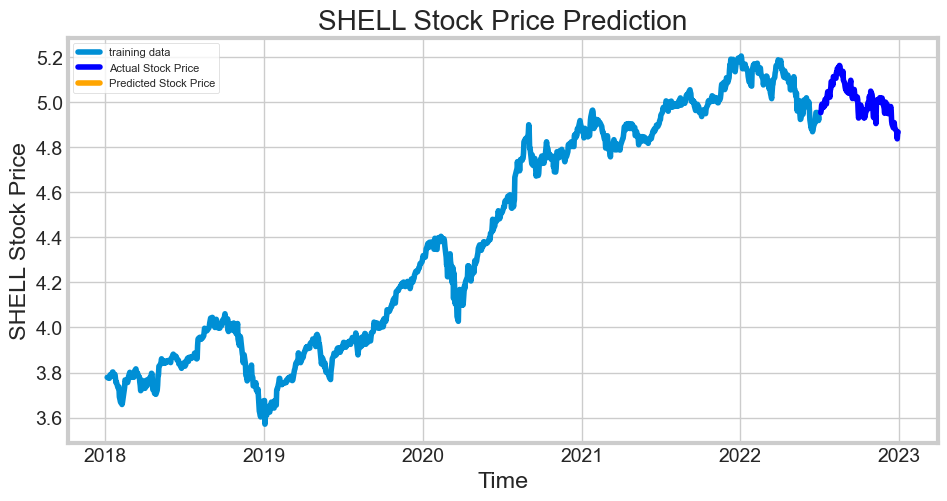

In [ ]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf['lower Close'], index=test_data.index)
upper_series = pd.Series(conf['upper Close'], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('SHELL Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SHELL Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.00924161956932106
MAE: 0.07740291814840025
RMSE: 0.0961333426513458
MAPE: nan


/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_10265/646637660.py:11: RuntimeWarning:

'<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.



Next steps: Create an ARIMA based trading strategy and analyse the strategy performance
Now, you can create an ARIMA based trading strategy using the predictions made.
After the strategy is created, you can analyse the performance of the strategy.
The output will give you Sharpe Ratio, cumulative return and the maximum drawdown.
The strategy performance will look like this as the plotted graph.

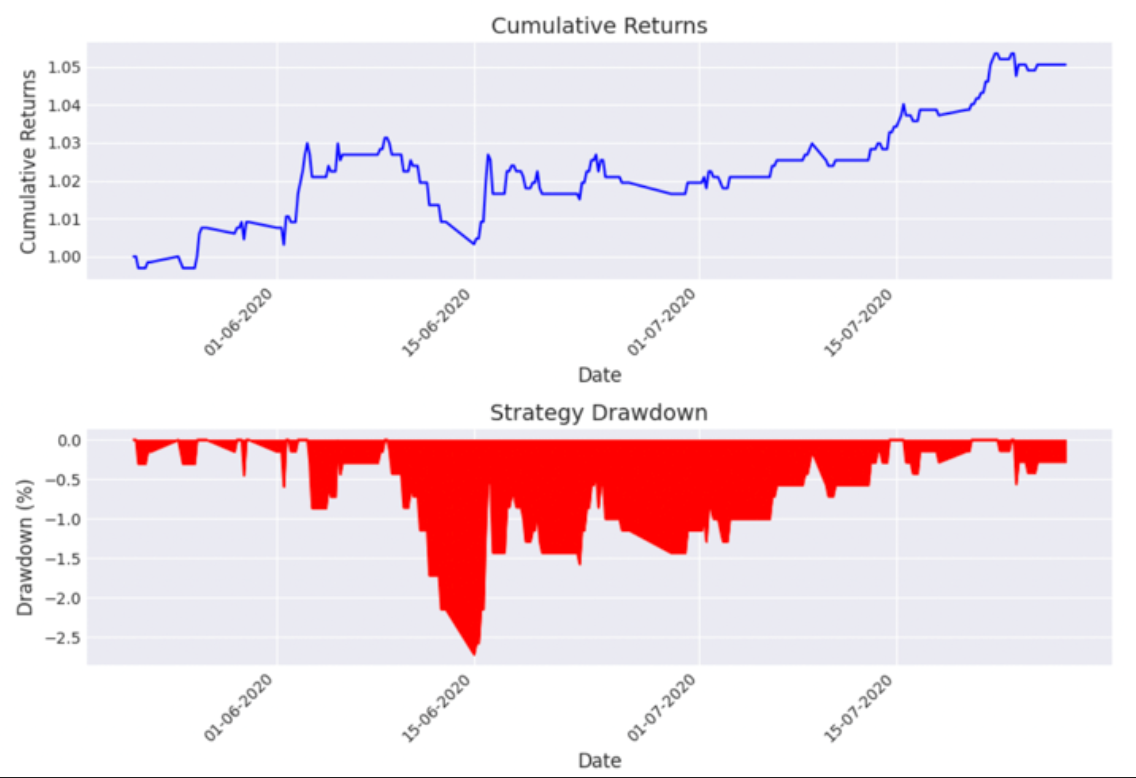

Pros of using ARIMA model in trading
- Captures Time-dependent Patterns: The ARIMA model is effective at capturing trends, seasonality, and other temporal patterns in time series data, providing valuable insights into market behaviour.
- Proven Methodology: ARIMA is a well-established and widely used modelling technique in time series analysis, with a solid foundation in statistics. It has been successfully applied in various domains, including trading.
- Interpretability: ARIMA models provide interpretable results, allowing traders to understand the relationship between past and future price movements and make informed decisions based on the model's coefficients and statistical measures.
- Handles Non-stationarity: The ARIMA model's integration component (the "I" in ARIMA) helps transform non-stationary data into stationary form, addressing one of the challenges often encountered in financial time series analysis.

Cons of using ARIMA model in trading
- Limited Complexity: ARIMA models assume linear relationships and may struggle to capture complex or nonlinear patterns in financial markets. They might not fully capture sudden changes or rare events that can significantly impact prices.
- Data Quality and Assumptions: ARIMA models require high-quality data and rely on assumptions such as stationarity and normality. Violations of these assumptions can affect the model's accuracy and reliability.
- Limited Incorporation of External Factors: ARIMA models primarily focus on historical price data and may not readily incorporate external factors such as news events, economic indicators, or market sentiment that can influence price movements.
- Short-term Focus: ARIMA models tend to be better suited for short-term forecasting rather than long-term predictions. They may struggle to capture longer-term trends or shifts in market dynamics.


(From https://blog.quantinsti.com/forecasting-stock-returns-using-arima-model/)


### LSTM Network

*Code adapted from https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm*

Predicting close price of AAPL...

In [ ]:
from datetime import datetime
# Get the stock quote
df = AAPL
# Show teh data
df.head()

,Adj Close,Close,High,Low,Open,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2018-01-02,40.722874,43.064999,43.075001,42.314999,42.540001,102223600,NaN,NaN,NaN,NaN
2018-01-03,40.715782,43.057499,43.637501,42.990002,43.132500,118071600,NaN,NaN,NaN,-0.000174
2018-01-04,40.904903,43.257500,43.367500,43.020000,43.134998,89738400,NaN,NaN,NaN,0.004645
2018-01-05,41.370617,43.750000,43.842499,43.262501,43.360001,94640000,NaN,NaN,NaN,0.011385
2018-01-08,41.216965,43.587502,43.902500,43.482498,43.587502,82271200,NaN,NaN,NaN,-0.003714


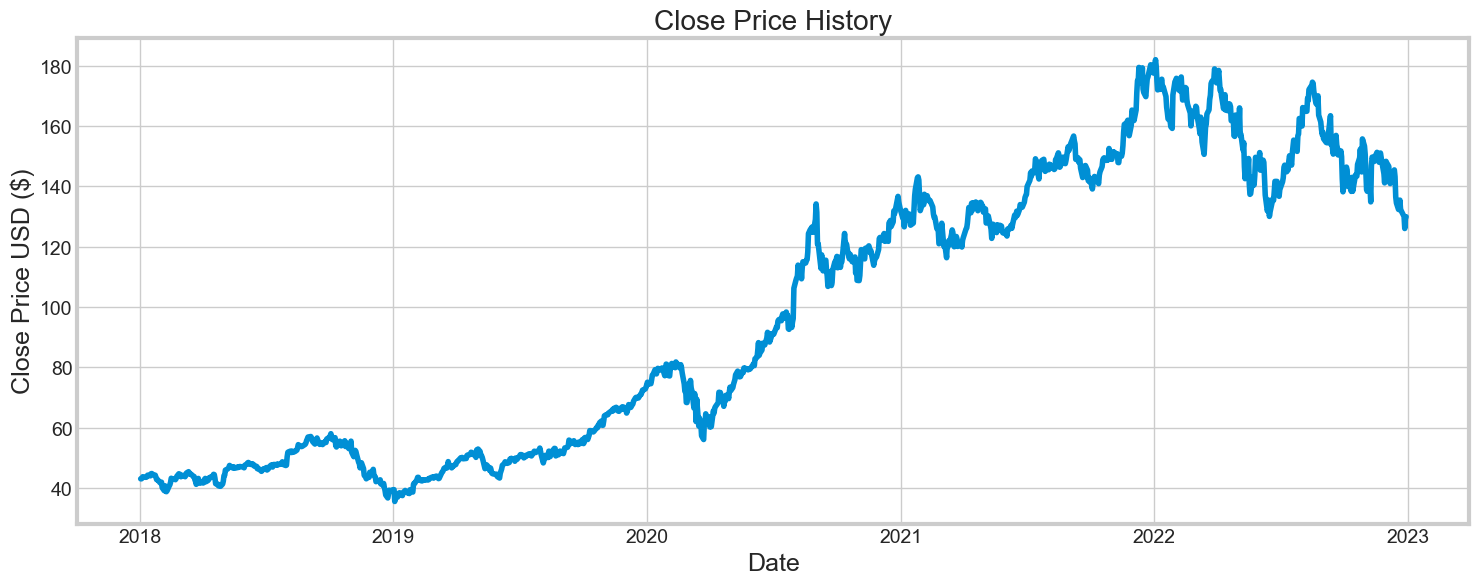

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.05132712],
       [0.05127591],
       [0.05264146],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .9 ))
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape, y_train.shape

((1074, 60, 1), (1074, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1074/1074 [==============================] - 27s 23ms/step - loss: 0.0028


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4/4 [==============================] - 1s 18ms/step


7.735234957620671

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_10265/637757777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


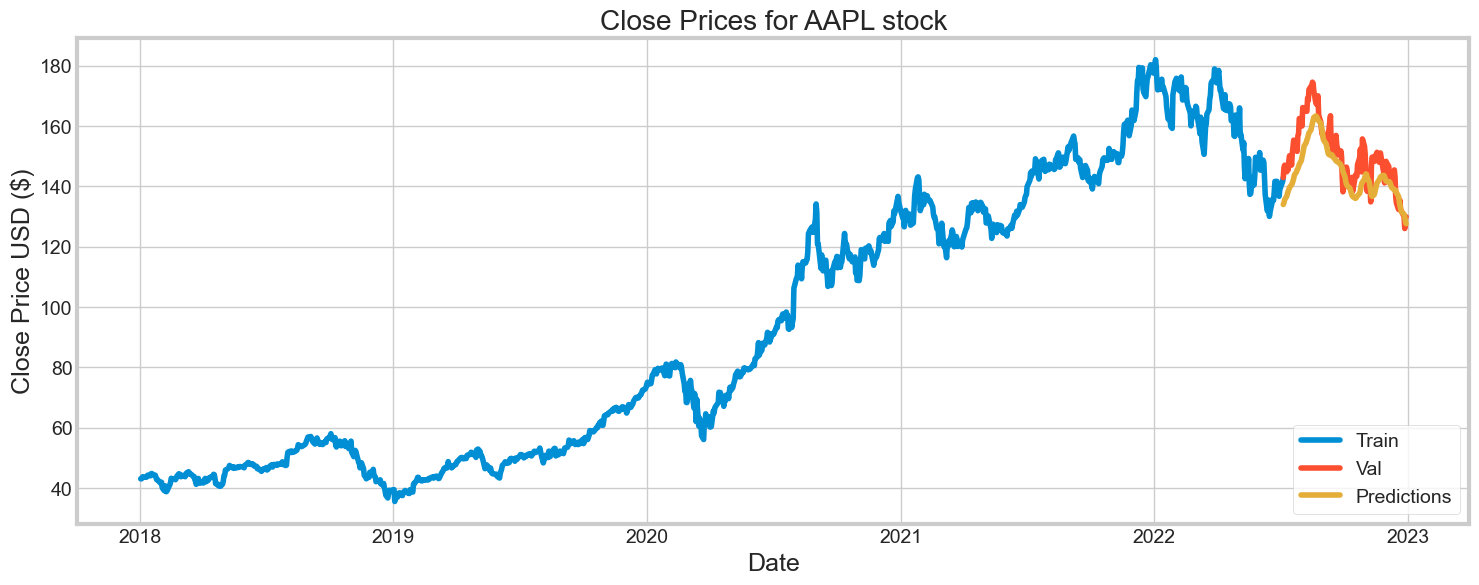

In [ ]:
# Plot the data
train = data[:training_data_len+1]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Close Prices for AAPL stock')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Create traces
trace1 = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
trace2 = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Validation')
trace3 = go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions')

# Layout
layout = go.Layout(title='Close Prices for AAPL stock',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Close Price USD ($)'))

# Figure
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)

# Show plot
fig.show()


In [ ]:
# Calculate residuals
valid['Residuals'] = valid['Close'] - valid['Predictions']

# Create a trace for residuals
trace_res = go.Scatter(x=valid.index, y=valid['Residuals'], mode='lines+markers', name='Residuals')

# Layout
layout_res = go.Layout(title='Residuals of AAPL Stock Predictions',
                       xaxis=dict(title='Date'),
                       yaxis=dict(title='Residuals'))

# Figure
fig_res = go.Figure(data=[trace_res], layout=layout_res)

# Show plot
fig_res.show()


/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_10265/720964869.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
valid['Prev Day Close'] = valid['Close'].shift(1)
valid['Control Residuals'] = valid['Close'] - valid['Prev Day Close']

# Create a trace for residuals
trace_res = go.Scatter(x=valid.index, y=valid['Residuals'], mode='lines+markers', name='Residuals')

# Layout
layout_res = go.Layout(title='Residuals of AAPL Stock Predictions',
                       xaxis=dict(title='Date'),
                       yaxis=dict(title='Residuals'))

# Figure
fig_res = go.Figure(data=[trace_res], layout=layout_res)

# Show plot
fig_res.show()

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_10265/1212904369.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/d7/ktx3dym91yjgj_gpmnfs0rh00000gn/T/ipykernel_10265/1212904369.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((valid["Predictions"] - valid["Close"]) ** 2)))
rmse

7.735234957620671

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((valid["Prev Day Close"] - valid["Close"]) ** 2)))
rmse

3.3193231717410665

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions,Residuals,Prev Day Close,Control Residuals
Date,,,,,
2022-07-06,142.919998,134.001450,8.918549,NaN,NaN
2022-07-07,146.350006,134.615616,11.734390,142.919998,3.430008
2022-07-08,147.039993,135.596725,11.443268,146.350006,0.689987
2022-07-11,144.869995,136.723648,8.146347,147.039993,-2.169998
2022-07-12,145.860001,137.603760,8.256241,144.869995,0.990005
...,...,...,...,...,...
2022-12-23,131.860001,131.692993,0.167007,132.229996,-0.369995
2022-12-27,130.029999,130.760178,-0.730179,131.860001,-1.830002
2022-12-28,126.040001,129.800873,-3.760872,130.029999,-3.989998
